In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Loading the data
To get started let's first load in the data! We will make use of the helper functions provided in `data_utils.py`

In [3]:
from data_utils import get_images, get_labels

The following is the list of disasters in our dataset. 

In [4]:
disaster_list = ["hurricane-matthew", "socal-fire", "midwest-flooding"]

We will load each disaster train dataset into a dictionary. Recall that each disaster consists of images and labels (0 - 3) of the damage level.

In [5]:
data = {}
split = "train"
with open('config.json') as config_file:
    config = json.load(config_file)
    data_dir = "satellite-image-data"

for disaster in disaster_list:
    print(f"Loading {split} images and labels for {disaster} dataset...")
    images = get_images(data_dir, disaster, split=split)
    labels = get_labels(data_dir, disaster, split=split)
    data[disaster] = {"images": images, "labels": labels}

Loading train images and labels for hurricane-matthew dataset...
Loading train images and labels for socal-fire dataset...
Loading train images and labels for midwest-flooding dataset...


Let's visualize an image and its label in the dataset. 

In [6]:
#disaster_list[0] = hurricane matthew
disaster = disaster_list[0]
#data is a nested dictionary
images = data[disaster]["images"]
labels = data[disaster]["labels"]

# index of the image to display
idx = 0
img = images[idx]
label = labels[idx]

plt.title(f"{disaster}, image {idx}, label {label}")
plt.imshow(img.astype(np.uint8))
plt.axis("off")
plt.show()

#
print(f"image shape: {img.shape}")

# Extracting Color Information
Each image is an RGB image represented as a numpy array of dimensions (width, height, 3). The last dimension corresponds to the RGB *color channels* in the image. We can split the image by color channels and visualize each of them individually.

In [7]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img[:, :, 0], cmap="Reds", vmin=0, vmax=255)
plt.title("Red Channel")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(img[:, :, 1], cmap="Greens", vmin=0, vmax=255)
plt.title("Green Channel")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(img[:, :, 2], cmap="Blues", vmin=0, vmax=255)
plt.title("Blue Channel")
plt.axis("off")

plt.show()

We can zoom in on just a pixel as well.

In [8]:
coord = (15, 35)
pixel_value = img[coord[0], coord[1], :]
pixel_image = np.array([[pixel_value]])

plt.imshow(pixel_image)
plt.axis("off")
plt.show()

print(f"Pixel value: {pixel_value}, coordinate: {coord}")

# Extracting Edge and Texture Information

So far we have considered the **color** information in an image. However, other important aspects of an image are the edges and texture. 

Let us consider some popular feature processing methods for extracting edge and texture information. We will use the utilities provided in `feature_utils.py`.

In [23]:
from feature_utils import get_sobel_features, get_gabor_features, generate_gabor_kernel, get_local_binary_pattern

Let's try the Sobel Edge Filter. 

Read more about Sobel edge detection: https://en.wikipedia.org/wiki/Sobel_operator and https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html

In [25]:
edges = get_sobel_features(img)
plt.imshow(edges, cmap="gray")
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()

print(edges)

Now let's look at local binary patterns. 

Read more about LBP: https://en.wikipedia.org/wiki/Local_binary_patterns and https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_local_binary_pattern.html

In [11]:
lbp = get_local_binary_pattern(img, radius=3)
plt.imshow(lbp, cmap="gray")
plt.axis("off")
plt.title("Local Binary Pattern (LBP)")
plt.show()

Another popular filter for image processing is the Gabor filter. The Gabor filters are a family of filters parametrized by orientation, frequency, bandwith, etc. Let's generate one such filter.

Read more about Gabor filters: https://en.wikipedia.org/wiki/Gabor_filter and https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_gabor.html

In [12]:
theta = 0
sigma = 1.0
frequency = 0.1

kernel = generate_gabor_kernel(theta, sigma, frequency)
gabor = get_gabor_features(img, kernel)

Let's visualize this filter (aka kernel) and the response of the image when we apply the filter. Concretely we are taking the convolution of the image with the filter. See https://en.wikipedia.org/wiki/Kernel_(image_processing) for more details.

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot Gabor Kernel
axs[0].imshow(kernel, cmap="gray")
axs[0].axis("off")  # Remove axis
axs[0].set_title("Gabor Kernel")

# Plot Gabor Kernel Response
axs[1].imshow(gabor, cmap="gray")
axs[1].axis("off")  # Remove axis
axs[1].set_title("Gabor Kernel Response")

plt.show()

# Exploratory Data Analysis

The agency would like you to start performing some exploratory data analysis to build an initial understanding of the data. As part of the exploratory data analysis, the agency is interested in understanding certain aspects of the dataset better. 

Feel free to add more cells as you see fit for your analysis. 

## CLEANING DATASET

In [8]:
# Remove Duplicates
print(type(data)) # dictinoary
print(type(data["hurricane-matthew"])) # dictionary
print(type(data["hurricane-matthew"]["images"])) # list
print(type(data["hurricane-matthew"]["images"][0])) # ndarray

hurricane_image_list = data["hurricane-matthew"]["images"]
hurricane_unique_tuples = set()
hurricane_images_unique_list = []
for image in hurricane_image_list:
    
    image_tuple = tuple(image.flatten())
    if image_tuple not in hurricane_unique_tuples:
        hurricane_images_unique_list.append(image)
        hurricane_unique_tuples.add(image_tuple)


hurricane_unique_len = len(hurricane_images_unique_list)
hurricane_num_images_original = (len(hurricane_image_list))

hurricane_num_duplicates = hurricane_num_images_original - hurricane_unique_len
print("number of duplicate images in hurricane: ", hurricane_num_duplicates)

##finding duplicates for socal-fire
fire_image_list = data["socal-fire"]["images"]
fire_unique_tuples = set()
fire_images_unique_list = []
for image in fire_image_list:
    
    image_tuple = tuple(image.flatten())

    if image_tuple not in fire_unique_tuples:
        fire_images_unique_list.append(image)
        fire_unique_tuples.add(image_tuple)


fire_unique_len = len(fire_images_unique_list)
fire_num_images_original= len(fire_image_list)

fire_num_duplicates = fire_num_images_original - fire_unique_len
print("number of duplicate images in firee: ", hurricane_num_duplicates)

##duplicates for flooding

flooding_image_list = data["midwest-flooding"]["images"]
flooding_unique_tuples = set()
flooding_images_unique_list = []
for image in flooding_image_list:
    
    image_tuple = tuple(image.flatten())

    if image_tuple not in flooding_unique_tuples:
        flooding_images_unique_list.append(image)
        flooding_unique_tuples.add(image_tuple)


flooding_unique_len = len(flooding_images_unique_list)
flooding_num_images_original = (len(flooding_image_list))

flooding_num_duplicates = flooding_num_images_original - flooding_unique_len
print("number of duplicate images in flooding: ", flooding_num_duplicates)

<class 'dict'>
<class 'dict'>
<class 'list'>
<class 'numpy.ndarray'>
number of duplicate images in hurricane:  0
number of duplicate images in firee:  0
number of duplicate images in flooding:  0


## Create Dataframe for each disaster

In [9]:
flooding_df = pd.DataFrame()
fire_df = pd.DataFrame()
hurricane_df = pd.DataFrame()

#images column, each image is identified by its index

flooding_image_index = np.arange(0,len(flooding_image_list), 1)

flooding_df["image"] = flooding_image_index

fire_image_index = np.arange(0,len(fire_image_list), 1)

fire_df["image"] = fire_image_index

hurricane_image_index = np.arange(0,len(hurricane_image_list), 1)

hurricane_df["image"] = hurricane_image_index


# EDA - Basic Statistics

## Number of Images per Disaster Type


In [10]:
disaster_list = ["hurricane-matthew", "socal-fire", "midwest-flooding"]
num_images = []
images = data[disaster]["images"]


hurricane_num_images = len(hurricane_image_list)
print(f"Number of images for Hurricane-matthew: {hurricane_num_images}")


socal_fire_num_images = len(fire_image_list)
print(f"Number of images for socal-fire: {socal_fire_num_images}")

midwest_flooding_num_images = len(flooding_image_list)
print(f"Number of images for midwest-flooding: {midwest_flooding_num_images}")



In [10]:
type(data["socal-fire"]["images"])
#print(data["socal-fire"]["images"][1][1])

image = data["socal-fire"]["images"][1]

height, width, colors = image.shape

print(height, width, colors)



48 51 3


## Distribution of Image Sizes in Each Dataset

## Hurricane matthew distribution of image sizes

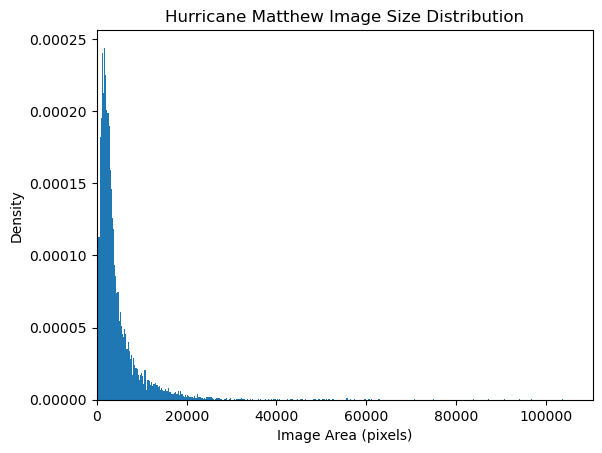

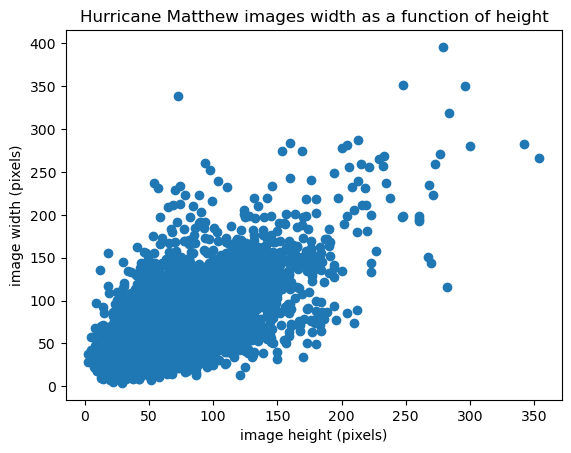

,image,image height,image width,image area
0,0,65,54,3510
1,1,67,105,7035
2,2,54,56,3024
3,3,114,124,14136
4,4,58,51,2958


In [11]:
#find dimensions of images for hurricane matthew
matthew_heights = []
matthew_widths = []
matthew_colors = []



#get width and height for all images in hurricane matthew
for i in range (11151):

    image = data["hurricane-matthew"]["images"][i]
    height, width, color = image.shape
    matthew_heights.append(height)
    matthew_widths.append(width)
    matthew_colors.append(color)
    
#convert lists to arrays 

matthew_heights_arr = np.array(matthew_heights)
matthew_widths_arr = np.array(matthew_widths)

#calculate area
matthew_areas = matthew_heights_arr * matthew_widths_arr

#add these are features to the data frame
hurricane_df["image height"] = matthew_heights_arr
hurricane_df["image width"] = matthew_widths_arr
hurricane_df["image area"] = matthew_areas


bins = np.arange(min(matthew_areas), max(matthew_areas), 250)
plt.figure()
plt.hist(matthew_areas, bins = bins, density = True)
plt.xlabel("Image Area (pixels)")
plt.xlim(0,max(matthew_areas))
plt.ylabel("Density")
plt.title("Hurricane Matthew Image Size Distribution")
plt.show()

plt.figure()
plt.scatter(matthew_heights, matthew_widths)
plt.title("Hurricane Matthew images width as a function of height")
plt.xlabel("image height (pixels)")
plt.ylabel("image width (pixels)")
plt.show()

hurricane_df.head()

## So-Cal fire distribution of image sizes

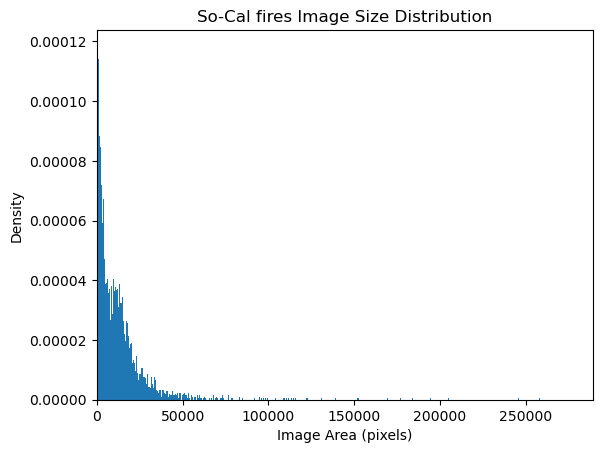

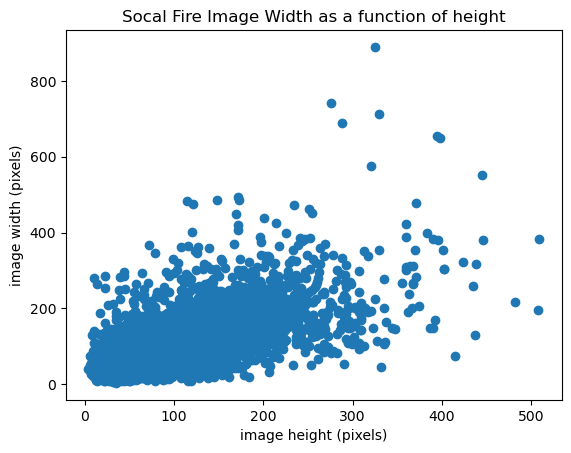

,image,image height,image width,image area
0,0,144,195,28080
1,1,48,51,2448
2,2,104,140,14560
3,3,128,138,17664
4,4,65,96,6240


In [12]:
#find dimensions of images for socal-fire
socal_heights = []
socal_widths = []
socal_colors = []
for i in range (8380):

    image = data["socal-fire"]["images"][i]
    height, width, color = image.shape
    socal_heights.append(height)
    socal_widths.append(width)
    socal_colors.append(color)

#convert lists to array
socal_heights_arr = np.array(socal_heights)
socal_widths_arr = np.array(socal_widths)

socal_areas = socal_heights_arr* socal_widths_arr

# Add features to Fire df
fire_df['image height'] = socal_heights_arr
fire_df['image width'] = socal_widths_arr
fire_df['image area'] = socal_areas



bins_socal = np.arange(min(socal_areas), max(socal_areas), 250)
plt.figure()
plt.hist(socal_areas, bins = bins_socal, density = True)
plt.xlim(0,max(socal_areas))
plt.xlabel("Image Area (pixels)")
plt.xlim(0,max(socal_areas))
plt.ylabel("Density")
plt.title("So-Cal fires Image Size Distribution")
plt.show()

plt.figure()
plt.scatter(socal_heights, socal_widths)
plt.title("Socal Fire Image Width as a function of height")
plt.xlabel("image height (pixels)")
plt.ylabel("image width (pixels)")
plt.show()

fire_df.head()

# Mid-west flooding distribution of image sizes

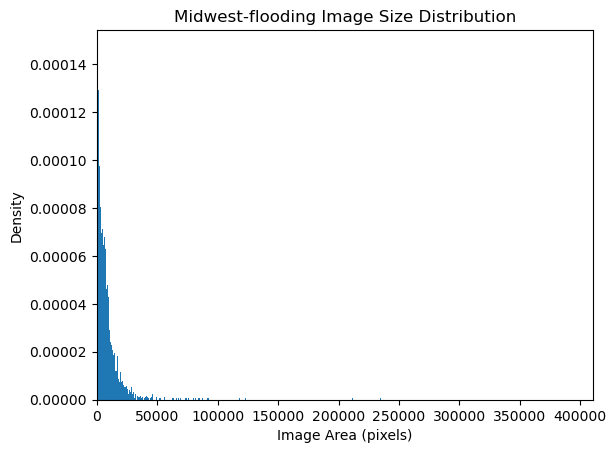

,image,image height,image width,image area
0,0,42,176,7392
1,1,163,189,30807
2,2,72,72,5184
3,3,46,48,2208
4,4,80,63,5040


In [13]:
# find dimensions of images for mid-west flooding
flooding_heights = []
flooding_widths = []
flooding_colors = []
for i in range (7004):

    image = data["midwest-flooding"]["images"][i]
    height, width, color = image.shape
    flooding_heights.append(height)
    flooding_widths.append(width)
    flooding_colors.append(color)

# calculate area    
flooding_areas = np.array(flooding_heights) * np.array(flooding_widths)

flooding_df["image height"] = np.array(flooding_heights)
flooding_df["image width"] = np.array(flooding_widths)
flooding_df["image area"] = flooding_areas

bins_flooding = np.arange(min(flooding_areas), max(flooding_areas), 250)
plt.figure()
plt.hist(flooding_areas, bins = bins_flooding, density = True)
plt.xlabel("Image Area (pixels)")
plt.xlim(0,max(flooding_areas))
plt.ylabel("Density")
plt.title("Midwest-flooding Image Size Distribution")
plt.show()

flooding_df.head()

## Distribution of Damage Labels

## Distribution of Damage Labels Hurricane Matthew

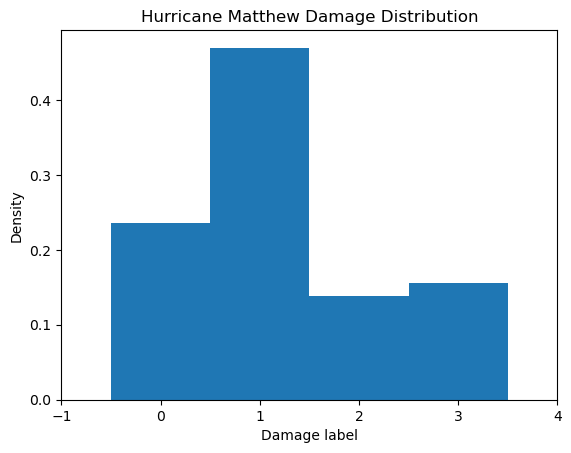

,image,image height,image width,image area,damage_labels
0,0,65,54,3510,3
1,1,67,105,7035,0
2,2,54,56,3024,1
3,3,114,124,14136,0
4,4,58,51,2958,2


In [14]:
#find all labels for hurricane matthew

#list to store all labels
matthew_damage_labels = []

for i in range (11151):

    label = data["hurricane-matthew"]["labels"][i]
    matthew_damage_labels.append(label)

hurricane_df["damage_labels"] = matthew_damage_labels

# calculate area    

bins = [-0.5, 0.5,1.5,2.5,3.5]

plt.figure()
plt.hist(matthew_damage_labels, bins = bins, density = True)
plt.xlabel("Damage label")
plt.xlim(0,max(matthew_damage_labels))
plt.ylabel("Density")
plt.xticks([-1,0, 1, 2, 3,4])
plt.title("Hurricane Matthew Damage Distribution")
plt.show()

#print(matthew_damage_labels)

hurricane_df.head()

## Distribution of Damage Labels So-Cal Fire

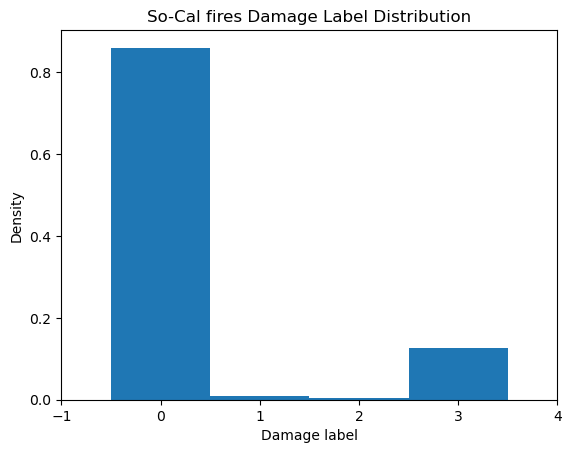

,image,image height,image width,image area,damage_labels
0,0,144,195,28080,0
1,1,48,51,2448,0
2,2,104,140,14560,0
3,3,128,138,17664,0
4,4,65,96,6240,0


In [15]:
# Find labels for socal-fire
socal_damage_labels = []
for i in range (8380):

    label = data["socal-fire"]["labels"][i]
    socal_damage_labels.append(label)

fire_df["damage_labels"] = socal_damage_labels

socal_labels_bins = [-0.5,0.5,1.5,2.5,3.5]
plt.figure()
plt.hist(socal_damage_labels, bins = socal_labels_bins, density = True)
plt.xlim(0,max(socal_damage_labels))
plt.xticks([-1,0, 1, 2, 3,4])
plt.xlabel("Damage label")
plt.ylabel("Density")
plt.title("So-Cal fires Damage Label Distribution")
plt.show()

fire_df.head()

## Distribution of Damage Labels Midwest-flooding

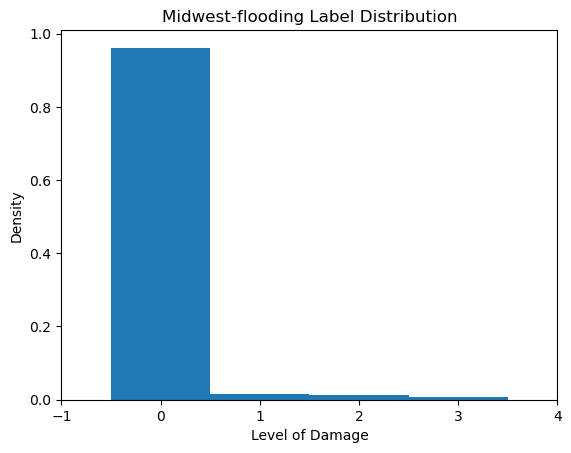

,image,image height,image width,image area,damage_labels
0,0,42,176,7392,0
1,1,163,189,30807,0
2,2,72,72,5184,0
3,3,46,48,2208,0
4,4,80,63,5040,1


In [16]:
# find labels for midwest-flooding
flooding_damage_labels = []
for i in range (7004):
    label = data["midwest-flooding"]["labels"][i]
    flooding_damage_labels.append(label)

flooding_df['damage_labels'] = flooding_damage_labels
flooding_label_bins = [-0.5, 0.5,1.5,2.5,3.5]
plt.figure()
plt.hist(flooding_damage_labels, bins = flooding_label_bins, density = True)
plt.xlabel("Level of Damage")
plt.xticks([-1,0, 1, 2, 3,4])
plt.ylabel("Density")
plt.title("Midwest-flooding Label Distribution")
plt.show()
flooding_df.head()

# EDA - Useful Image Features for Classification

The agency is looking for insights into useful image features for classifying images based on disaster type or damage level. You are tasked with verifying this and exploring whether color, edge, or texture features can effectively differentiate:

1. `midwest-flooding` from `socal-fire` images.
2. Damage levels 1 and 3 within the `hurricane-matthew` dataset.

Previous interns have found color information to be potentially useful.

## Distribution of Color (RGB)

In [18]:
first_img = data["midwest-flooding"]["images"][0]
height, width, color = first_img.shape

#height = rows

#width = columns

print(height, width)
j = len(data["midwest-flooding"]["images"][0])
print(j)

## Distribution of color Midwest-flooding FIX!!!!!!

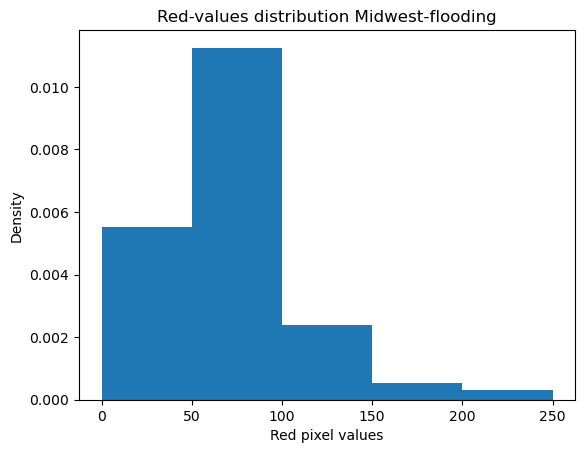

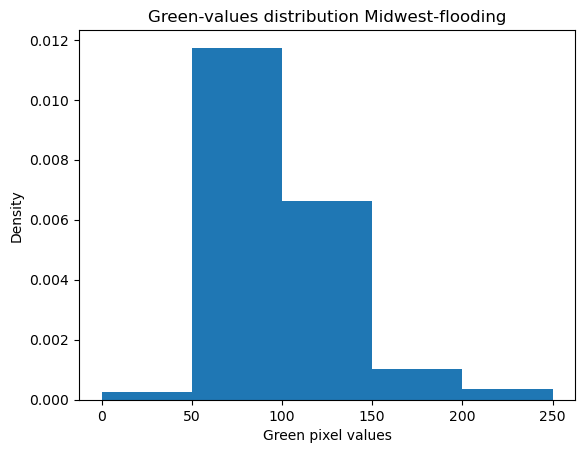

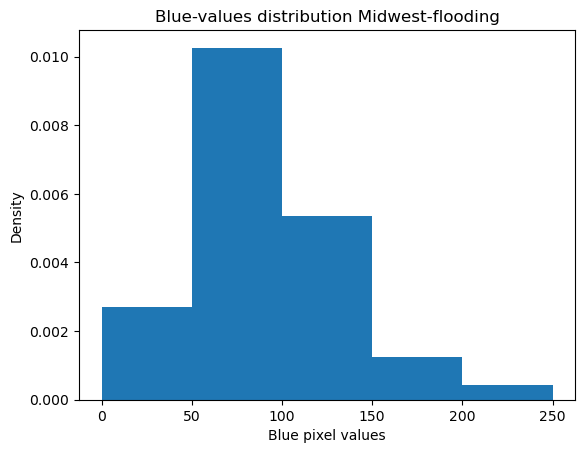

,image,image height,image width,image area,damage_labels,red values,green values,blue values
0,0,65,54,3510,3,101.084046,105.275783,101.084046
1,1,67,105,7035,0,110.248330,119.422886,110.248330
2,2,54,56,3024,1,119.043320,122.160714,119.043320
3,3,114,124,14136,0,127.725382,128.503962,127.725382
4,4,58,51,2958,2,96.311359,108.778905,96.311359


In [20]:
flooding_reds = []
flooding_greens = []
flooding_blues = []

flooding_red_avg_per_image = []
flooding_green_avg_per_image = []
flooding_blue_avg_per_image = []

        #i   , j   , n ,  
#images[image][row][pixel][RBG]
for i in range(7004): # index into each image
    image = data["midwest-flooding"]["images"][i]
    reds = []
    greens = []
    blues = []
    for j in range(image.shape[0]): # index into each row, j is row
        for n in range(image.shape[1]): # each pixel, n is column
            flooding_reds.append(data["midwest-flooding"]["images"][i][j][n][0])
            reds.append(data["midwest-flooding"]["images"][i][j][n][0])
            flooding_greens.append(data["midwest-flooding"]["images"][i][j][n][1])
            greens.append(data["midwest-flooding"]["images"][i][j][n][0])
            flooding_blues.append(data["midwest-flooding"]["images"][i][j][n][2])
            blues.append(data["midwest-flooding"]["images"][i][j][n][0])
            
    flooding_red_avg_per_image.append(np.mean(reds))
    flooding_green_avg_per_image.append(np.mean(greens))
    flooding_blue_avg_per_image.append(np.mean(blues))



flooding_df["red avg values"] = flooding_red_avg_per_image
flooding_df["green avg values"] = flooding_green_avg_per_image
flooding_df["blue avg values"] = flooding_blue_avg_per_image

color_bins = np.arange(0, 255, 50)

plt.figure()
plt.hist(flooding_reds, bins = color_bins, density = True)
plt.xlabel("Red pixel values")
plt.ylabel("Density")
plt.title("Red-values distribution Midwest-flooding")
plt.show()


plt.figure()
plt.hist(flooding_greens, bins = color_bins, density = True)
plt.xlabel("Green pixel values")
plt.ylabel("Density")
plt.title("Green-values distribution Midwest-flooding")
plt.show()

plt.figure()
plt.hist(flooding_blues, bins = color_bins, density = True)
plt.xlabel("Blue pixel values")
plt.ylabel("Density")
plt.title("Blue-values distribution Midwest-flooding")
plt.show()

hurricane_df.head()

## Distribution of color for Hurricane-Matthew

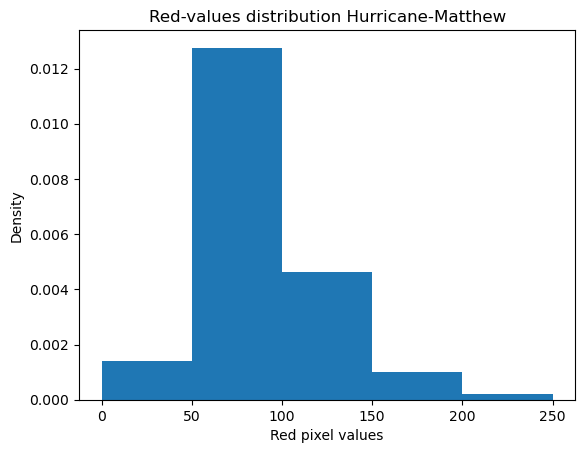

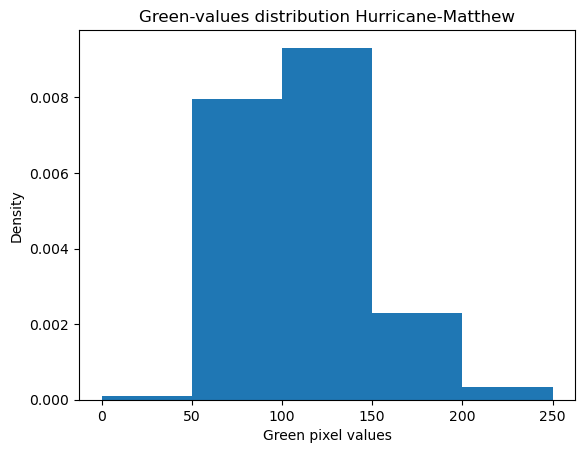

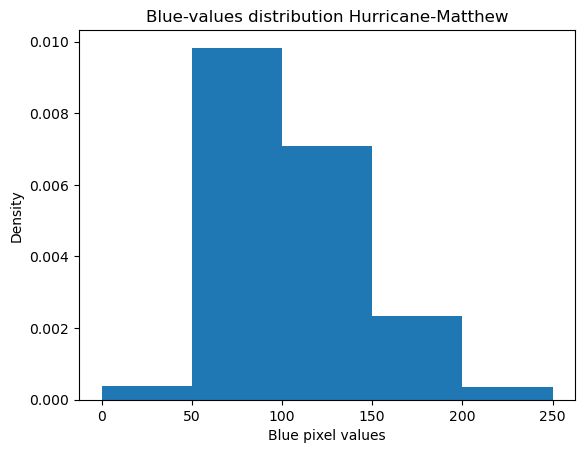

,image,image height,image width,image area,damage_labels,red values,green values,blue values
0,0,65,54,3510,3,101.084046,105.275783,101.084046
1,1,67,105,7035,0,110.248330,119.422886,110.248330
2,2,54,56,3024,1,119.043320,122.160714,119.043320
3,3,114,124,14136,0,127.725382,128.503962,127.725382
4,4,58,51,2958,2,96.311359,108.778905,96.311359


In [17]:
matthew_reds = []
matthew_greens = []
matthew_blues = []

matthew_red_avg_per_image = []
matthew_green_avg_per_image = []
matthew_blue_avg_per_image = []
        #i   , j   , n ,  
#images[image][row][pixel][RBG]
for i in range(11151): # index into each image
    image = data["hurricane-matthew"]["images"][i]
    reds = []
    greens = []
    blues = []
    for j in range(image.shape[0]): # index into each row, j is row
        for n in range(image.shape[1]): # each pixel, n is column
            matthew_reds.append(data["hurricane-matthew"]["images"][i][j][n][0])
            reds.append(data["hurricane-matthew"]["images"][i][j][n][0])
            matthew_greens.append(data["hurricane-matthew"]["images"][i][j][n][1])
            greens.append(data["hurricane-matthew"]["images"][i][j][n][1])
            matthew_blues.append(data["hurricane-matthew"]["images"][i][j][n][2])
            blues.append(data["hurricane-matthew"]["images"][i][j][n][2])

    matthew_red_avg_per_image.append(np.mean(reds))
    matthew_green_avg_per_image.append(np.mean(greens))
    matthew_blue_avg_per_image.append(np.mean(blues))



hurricane_df["red values"] = matthew_blue_avg_per_image
hurricane_df["green values"] = matthew_green_avg_per_image
hurricane_df["blue values"] = matthew_blue_avg_per_image

color_bins = np.arange(0, 255, 50)

plt.figure()
plt.hist(matthew_reds, bins = color_bins, density = True)
plt.xlabel("Red pixel values")
plt.ylabel("Density")
plt.title("Red-values distribution Hurricane-Matthew")
plt.show()


plt.figure()
plt.hist(matthew_greens, bins = color_bins, density = True)
plt.xlabel("Green pixel values")
plt.ylabel("Density")
plt.title("Green-values distribution Hurricane-Matthew")
plt.show()

plt.figure()
plt.hist(matthew_blues, bins = color_bins, density = True)
plt.xlabel("Blue pixel values")
plt.ylabel("Density")
plt.title("Blue-values distribution Hurricane-Matthew")
plt.show()

hurricane_df.head()

## Distribution of colors for So-Cal Fires

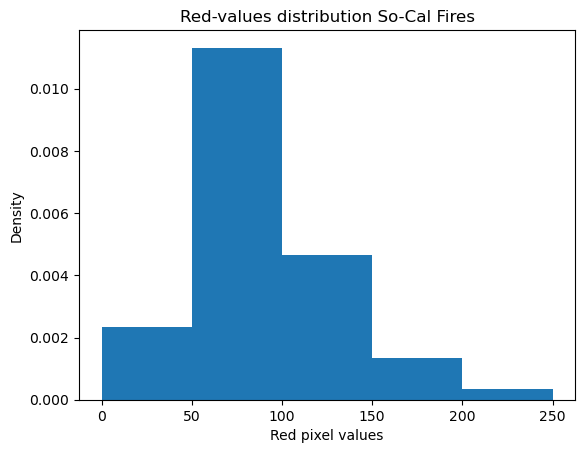

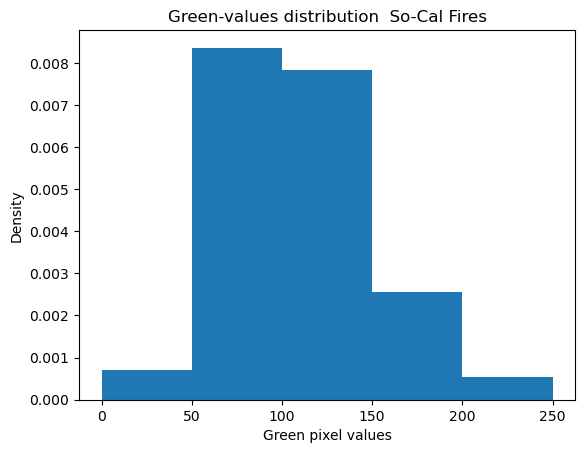

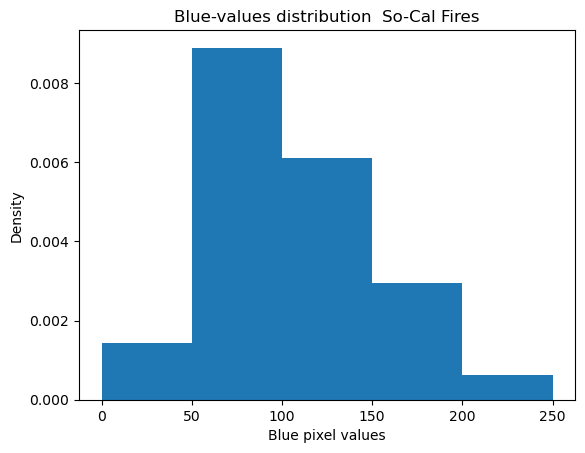

In [18]:
socal_reds = []
socal_greens = []
socal_blues = []

socal_red_avg_per_image = []
socal_green_avg_per_image = []
socal_blue_avg_per_image = []

        #i   , j   , n ,  
#images[image][row][pixel][RBG]
for i in range(8380): # index into each image
    image = data["socal-fire"]["images"][i]
    reds = []
    greens = []
    blues = []
    for j in range(image.shape[0]): # index into each row, j is row
        for n in range(image.shape[1]): # each pixel, n is column
            socal_reds.append(data["socal-fire"]["images"][i][j][n][0])
            reds.append(data["socal-fire"]["images"][i][j][n][0])
            socal_greens.append(data["socal-fire"]["images"][i][j][n][1])
            greens.append(data["socal-fire"]["images"][i][j][n][1])
            socal_blues.append(data["socal-fire"]["images"][i][j][n][2])
            blues.append(data["socal-fire"]["images"][i][j][n][2])

    socal_red_avg_per_image.append(np.mean(reds))
    socal_green_avg_per_image.append(np.mean(greens))
    socal_blue_avg_per_image.append(np.mean(blues))

color_bins = np.arange(0, 255, 50)

fire_df["red avg value"] = socal_red_avg_per_image
fire_df["green avg value"] = socal_green_avg_per_image
fire_df["blue avg value"] = socal_blue_avg_per_image

plt.figure()
plt.hist(socal_reds, bins = color_bins, density = True)
plt.xlabel("Red pixel values")
plt.ylabel("Density")
plt.title("Red-values distribution So-Cal Fires")


plt.figure()
plt.hist(socal_greens, bins = color_bins, density = True)
plt.xlabel("Green pixel values")
plt.ylabel("Density")
plt.title("Green-values distribution  So-Cal Fires")
plt.show()

plt.figure()
plt.hist(socal_blues, bins = color_bins, density = True)
plt.xlabel("Blue pixel values")
plt.ylabel("Density")
plt.title("Blue-values distribution  So-Cal Fires")
plt.show()

In [19]:
fire_df.head()

,image,image height,image width,image area,damage_labels,red avg value,green avg value,blue avg value
0,0,144,195,28080,0,110.409046,131.513390,126.103811
1,1,48,51,2448,0,70.399918,89.844771,87.334559
2,2,104,140,14560,0,97.319162,122.642376,111.622184
3,3,128,138,17664,0,96.571841,113.395041,108.018512
4,4,65,96,6240,0,76.582532,103.573878,99.056731


## Distribution of Sobel Edges

# distribution of Sobel edges hurricane-matthew

In [ ]:
hurricane_sobel_edges_agg = []
matthew_edges_list = []
for i in range(11151):
    img_edges = get_sobel_features(data["hurricane-matthew"]["images"][i])
    matthew_edges_list.append(img_edges.flatten())
    hurricane_sobel_edges_agg.append(np.mean(img_edges))

#edges_bins = np.arange(min(flatten_edges), max(flatten_edges), 25)
hurricane_df["sobel edges avg"] = hurricane_sobel_edges_agg

plt.figure()
plt.hist(matthew_edges_list, density = True)
plt.xlabel("edge values")
plt.ylabel("Density")
plt.title("Edge distribution Hurricane-Matthew")


## distribution of sobel edges flooding

In [ ]:
flooding_edges_list = []
flooding_sobel_edges_agg = []
for i in range(11151):
    img_edges = get_sobel_features(data["midwest-flooding"]["images"][i])
    flooding_edges_list.append(img_edges.flatten())
    flooding_sobel_edges_agg.append(np.mean(img_edges))

#edges_bins = np.arange(min(flatten_edges), max(flatten_edges), 25)

flooding_df['sobel edges avg'] = flooding_sobel_edges_agg
plt.figure()
plt.hist(matthew_edges_list, density = True)
plt.xlabel("edge values")
plt.ylabel("Density")
plt.title("Edge distribution midwest-flooding")

## Distribution of sobel edges fire

In [ ]:
fire_sobel_edges_agg = []
fire_edges_list = []
for i in range(11151):
    img_edges = get_sobel_features(data["socal-fire"]["images"][i])
    fire_edges_list.append(img_edges.flatten())
    fire_sobel_edges_agg.append(np.mean(img_edges))

fire_df["sobel edges avg"]] = fire_sobel_edges_agg
#edges_bins = np.arange(min(flatten_edges), max(flatten_edges), 25)

plt.figure()
plt.hist(matthew_edges_list, density = True)
plt.xlabel("edge values")
plt.ylabel("Density")
plt.title("Edge distribution socal-fire")

## How are the distributions "separable"?

The below are a non-exhaustive list of ways we can think about classifying these disaster images. You do not have to include all of them in your analysis.

### 1. `midwest-flooding` vs `socal-fire`

Among the different disaster events, are there are distinctions in:

- image height, width, or overall size?
- RGB values?
- Sobel edges?
- Local Binary Patterns?
- Gabor kernels?



Distributions are separable between midwest-flooding and so-cal fire with respect to RBG value. 

KeyboardInterrupt: 

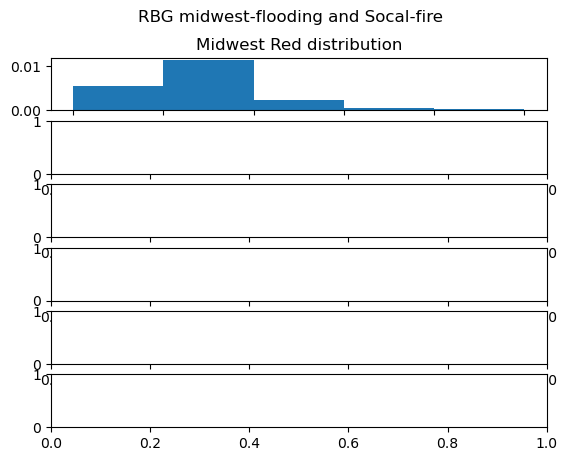

In [21]:
fig, axs = plt.subplots(6)
fig.suptitle('RBG midwest-flooding and Socal-fire')

axs[0].hist(flooding_reds, color_bins, density=True)
axs[0].set_title("Midwest Red distribution")

axs[1].hist(flooding_blues, color_bins, density=True)
axs[0].set_title("Midwest Blue distribution")



In [1]:
fig, ax = plt.subplots()
ax.hist(socal_reds, bins = color_bins, density = True)
ax.hist(flooding_reds, bins = color_bins, density = True)
plt.legend()
plt.title('Socal and Midwest Red Distribution')
plt.xlabel('Red Pixel Values')
plt.ylabel('Density')
plt.show()

fig, ax = plt.subplots()
ax.hist(socal_greens, bins = color_bins, density = True)
ax.hist(flooding_greens, bins = color_bins, density = True)
plt.legend()
plt.title('Socal and Midwest Green Distribution')
plt.xlabel('Green Pixel Values')
plt.ylabel('Density')
plt.show()

fig, ax = plt.subplots()
ax.hist(socal_blues, bins = color_bins, density = True)
ax.hist(flooding_blues, bins = color_bins, density = True)
plt.legend()
plt.title('Socal and Midwest Blue Distribution')
plt.xlabel('Blue Pixel Values')
plt.ylabel('Density')
plt.show()

NameError: name 'plt' is not defined

### 2. Damage levels 1 vs 3 within the `hurricane-matthew` dataset

Is there a relationship between the damage level and:

- image height, width, or overall size?
- RGB values?
- Sobel edges?
- Local Binary Patterns?
- Gabor kernels?

In [ ]:
# compare RBG value to damage level

damage_level_color = {0: {'reds': [], 'greens': [], 'blues': []}, 
                     1: {'reds': [], 'greens': [], 'blues': []},
                     2: {'reds': [], 'greens': [], 'blues': []}, 
                     3: {'reds': [], 'greens': [], 'blues': []}}

for i in range(len(data["hurricane-matthew"]["images"])): # for each image extract rgb and append to list
    image = data["hurricane-matthew"]["images"][i]
    damage_level = data["hurricane-matthew"]["labels"][i]
    for j in range(image.shape[0]): # index into each row, j is row
        for n in range(image.shape[1]): # each pixel, n is column
            damage_level_color[damage_level]["reds"].append(data["hurricane-matthew"]["images"][i][j][n][0]) 
            damage_level_color[damage_level]["greens"].append(data["hurricane-matthew"]["images"][i][j][n][1]) 
            damage_level_color[damage_level]["blues"].append(data["hurricane-matthew"]["images"][i][j][n][2]) 


In [ ]:
colors = ["reds", "greens", "blues"]
fig, axs = plt.subplots(len(damage_level_color), len(colors), figsize=(15, 10))

for key in damage_level_color.keys():
    for idx, color in enumerate(colors):
        #plt.hist(damage_level_color[key], density = True); # show the distribution of color for category
        axs[key, idx].hist(damage_level_color[key][color][:1000], density = True); # show the distribution of reds for given category
        axs[key, idx].set_title(f"Distribution of {color} values for damage level {key}")
        axs[key, idx].set_xlabel(f"{color} values")
        axs[key, idx].set_ylabel("Density")

plt.tight_layout()
plt.show()

In [ ]:
damage_level_color_mean = {0: {'reds': [], 'greens': [], 'blues': []}, 
                     1: {'reds': [], 'greens': [], 'blues': []},
                     2: {'reds': [], 'greens': [], 'blues': []}, 
                     3: {'reds': [], 'greens': [], 'blues': []}}

for key in damage_level_color.keys():
    for color in colors:
        #plt.hist(damage_level_color[key], density = True); # show the distribution of color for category
        #axs[key, idx].hist(damage_level_color[key][color][:1000], density = True); # show the distribution of reds for given category
        damage_level_color_mean[key][color] = np.mean(damage_level_color[key][color])
        #print(f"Average value for {color} for Damage level {key}: {damage_level_color_mean[key][color]}")
